In [1]:
import pygraphviz as pgv

from IPython.display import Image, display

from transition_graph import TransitionGraph, MooreMachine, MealyMachine
from utils import *

from prettytable import PrettyTable

In [2]:
def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

In [3]:
def print_tt(tt):
    t = PrettyTable()
    t.field_names = ['', *tt[0]]
    t.add_rows([[k, *[','.join(i) for i in v]] for k, v in tt[1].items()])
    print(t)

# Basic Utils

### Check if string is from language

In [3]:
bool(match_string_from_lang("ababab", ["aba", "bab"]))

True

### Generate Power String on length n

In [4]:
power_string(3, ["b", "a"])

['bbb', 'bba', 'bab', 'baa', 'abb', 'aba', 'aab', 'aaa']

### Check if string is plindrome

In [5]:
is_palindrome('baababa', ['ba', 'aba'])

True

### Generate power palindrom string of length n

In [6]:
power_palindrome_string(4, ['a', 'b'])

['aaaa', 'abba', 'baab', 'bbbb']

# Transition Graph

In [5]:
# create a transition graph from transition table
tg = TransitionGraph.from_transition_table(
    ['a', 'b'], # language words
    {
        'q1': ['q2', 'q3'],
        'q2': ['q1', None, 'q3'],
        'q3': [None, ['q3', 'q4']],
        'q4': [['q3', 'q2'], None],
    },
    start_node='q1',
    finish_nodes=['q3', 'q4']
)

# tg = TransitionGraph.from_transition_table(
#     ['a', 'b'], # language words
#     {
#         'q1': ['q2', 'q3'],
#         'q2': ['q4', 'q3'],
#         'q3': ['q2', 'q3'],
#         'q4': ['q4', 'q5'],
#         'q5': ['q4', 'q5'],
#     },
#     start_node='q1',
#     finish_nodes=['q5']
# )

# Some other examples
# tg = TransitionGraph.from_transition_table(['a', 'b'], {
#         'q0': [None, None, ['q1', 'q2']],
#         'q1': ['q3', None],
#         'q2': ['q4', None],
#         'q3': [None, 'q1'],
#         'q4': [None, 'q5'],
#         'q5': ['q2', None]
#     }, start_node='q0', finish_nodes=['q1', 'q2'])

# tg = TransitionGraph.from_transition_table(['a', 'b'], {
#         'q1': ['q1', 'q2'],
#         'q2': ['q3', 'q2'],
#         'q3': ['q1', 'q2'],
#     }, start_node='q1', finish_nodes=['q1'])

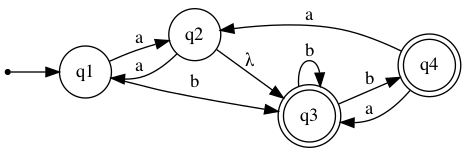

In [6]:
# draw transition graph
draw(tg.to_dot_diagram())

In [5]:
# evaluate string on transition graph
tg.evaluate('aab')

[True, 'q3', 3]

### State Elimination

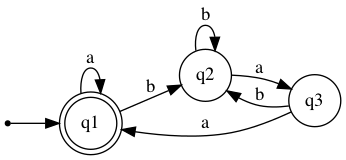

removed state q2


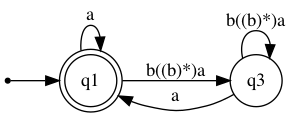

removed state q3


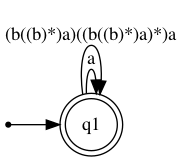

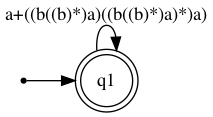

In [4]:
tg1 = tg.clone()
display(draw(tg1.to_dot_diagram()))

# elimnate state until only start and finish states are left
while tg1.eliminate_state():
    display(draw(tg1.to_dot_diagram()))

### NFA to DFA

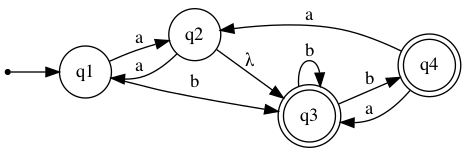

In [11]:
# Step 1: construct the NFA and draw it to verify
nfa = TransitionGraph.from_transition_table(
    ['a', 'b'], # language words
    {
        'q1': ['q2', 'q3'],
        'q2': ['q1', None, 'q3'],
        'q3': [None, ['q3', 'q4']],
        'q4': [['q3', 'q2'], None],
    },
    start_node='q1',
    finish_nodes=['q3', 'q4']
)

draw(nfa.to_dot_diagram())

In [13]:
# Step 2: convert nfa to dfa and print the new transition table
dfa_raw = nfa.to_dfa()
print_tt(dfa_raw)

+------+-------+-------+
|      |   a   |   b   |
+------+-------+-------+
|  q1  |   q2  |   q3  |
|  q3  |       | q3,q4 |
| q3q4 | q3,q2 | q3,q4 |
| q3q2 |   q1  | q3,q4 |
|  q2  |   q1  |       |
+------+-------+-------+


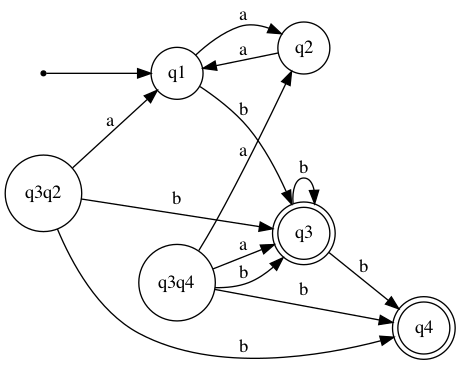

In [14]:
# Step 3: construct DFA from the returned raw data
dfa = TransitionGraph.from_transition_table(*dfa_raw)
draw(dfa.to_dot_diagram())

q3q4, q3q2


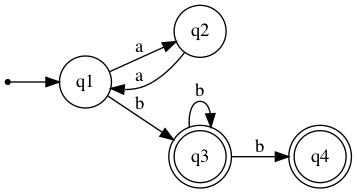

In [15]:
# Step 4: just remove the hanging node
dfa.remove_hanging_node()
draw(dfa.to_dot_diagram())

### RE to NFA

In [ ]:
# TOOD:

### Mealy to Mealy

In [3]:
mealy_mac = MealyMachine.from_transition_table(
    ['a', 'b'], # language words
    {
        'q0': [(0, 'q0'), (1, 'q1')],
        'q1': [(0, 'q0'), (1, 'q1')],
    },
    start_node='q0',
    finish_nodes=['q1']
)

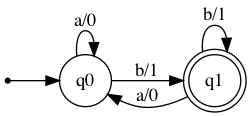

In [4]:
draw(mealy_mac.to_dot_diagram())

### Moore to Mealy

In [3]:
moore_mac = MooreMachine.from_transition_table(
    ['a', 'b'], # language words
    {
        'q0': (0, ['q0', 'q1']),
        'q1': (1, ['q0', 'q1']),
    },
    start_node='q0',
    finish_nodes=['q1']
)

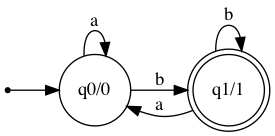

In [4]:
draw(moore_mac.to_dot_diagram())